## MNIST neuron network model

### Install modules and libraries

In [612]:
import numpy 
import pandas 
import seaborn 
from  matplotlib import pyplot 

from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from keras import models
from keras import layers
from keras.datasets import mnist 
from keras.utils import to_categorical
from keras.models import load_model

#### Preprocessing and data analysis

In [588]:
(features_train, target_train), (features_test, target_test) = mnist.load_data()

features_train, target_train = shuffle(features_train, target_train, random_state=1)
features_test, target_test = shuffle(features_test, target_test, random_state=1)


In [589]:
print(features_train.shape, features_test.shape)
print(target_train.shape)

(60000, 28, 28) (10000, 28, 28)
(60000,)


In [590]:
def show_number_by_index(index:int = 0, features: numpy.ndarray = None,targets: numpy.ndarray = None):
    '''
    this function show numbers's image by index of this number in set
    '''
    pyplot.imshow(features[index], cmap='gray')
    print(f"label is {targets[index]}")

label is 1


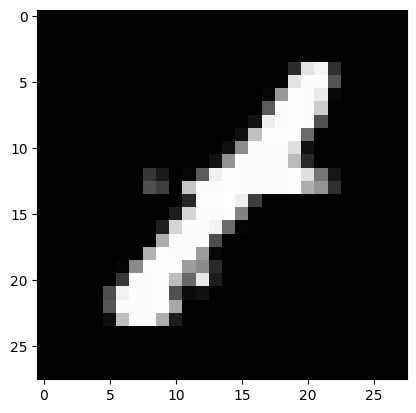

In [591]:
# showing some number for compare later
show_number_by_index(index=17, 
                    features= features_train, 
                    targets= target_train)

In [592]:
def normalize_images(images):
    '''
    this function converting images uint8 -> float32(from 0 to 1)
    '''
    return numpy.float32(images) / 255

def preprocessing_pipeline(features: numpy.ndarray = None, tagrets: numpy.ndarray = None):
    '''
    this function processes the data on which the network will be trained 
    and which the model will receive for prediction
    '''
    normalized_features = normalize_images(features)
    flatten_normalized_features = normalized_features.reshape((-1, 28 * 28))
    categorical_targets = to_categorical(tagrets)

    return flatten_normalized_features, categorical_targets

In [593]:
# processes test and train data before fit the model 
ready_features_train, ready_targets_train = preprocessing_pipeline(features=features_train, tagrets=target_train)
ready_features_test, ready_targets_test = preprocessing_pipeline(features=features_test, tagrets=target_test)

#### Create and train model

In [594]:
# network's parameters
epochs = 20
batch_size = 256
activation = "relu"
optimizer = "Adam"

In [595]:
model = models.Sequential()

model.add(layer=layers.Input(shape=(28 * 28,)))
model.add(layer=layers.Dense(64, activation=activation))
model.add(layer=layers.Dense(32, activation=activation))
model.add(layer=layers.Dense(16, activation=activation))
model.add(layer=layers.Dense(10, activation=activation))
model.add(layer=layers.Softmax())

model.compile(loss='categorical_crossentropy', 
              optimizer=optimizer, 
              metrics=['accuracy'])

history = model.fit(ready_features_train, ready_targets_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=0,
                    validation_data=(ready_features_test, ready_targets_test))


In [602]:
#save model
model.save("mnist_classifier.keras")

#### Analysis of model results

In [603]:
model_loss = history.history['loss']
model_accuracy = history.history['accuracy']

model_results_df = pandas.DataFrame({'accuracy': model_accuracy,
                                     'loss':model_loss}).rename_axis('epoch')
model_results_df[14:]

,accuracy,loss
epoch,,
14,0.990267,0.034163
15,0.990750,0.031450
16,0.991400,0.030040
17,0.991917,0.027849
18,0.992883,0.024877
19,0.994250,0.021530


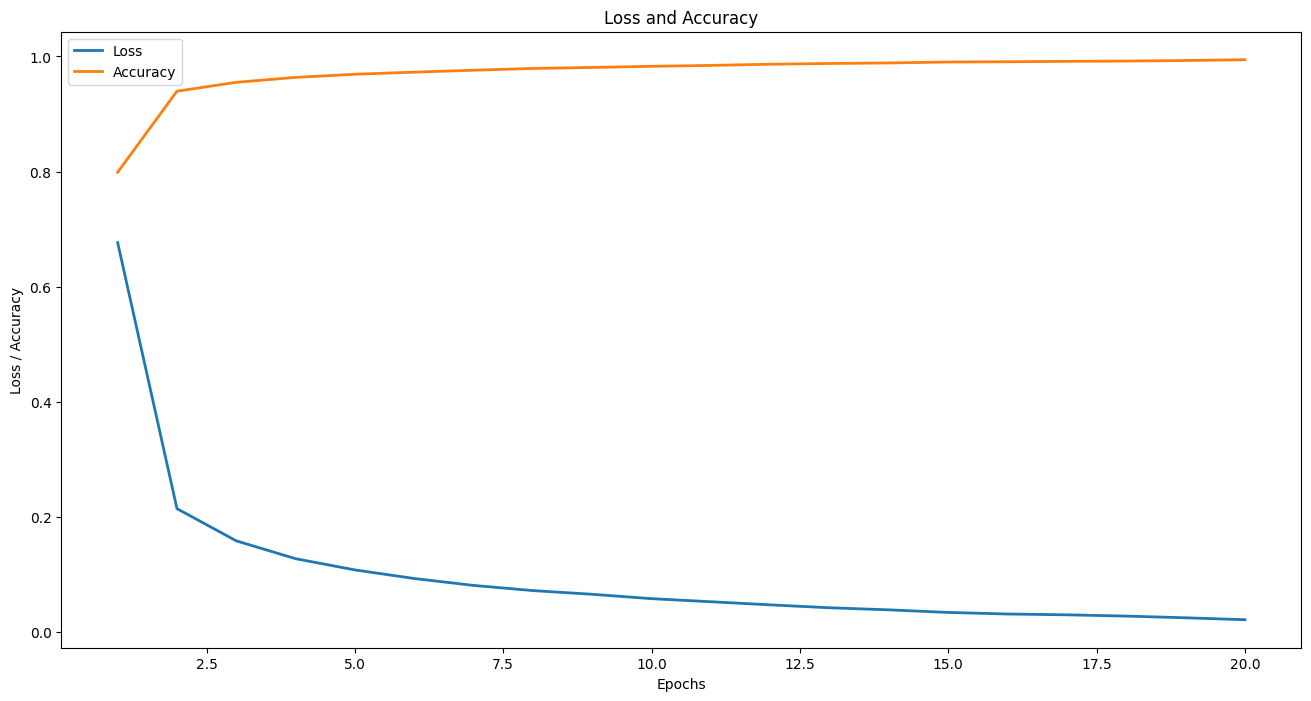

In [604]:
# display a graph to evaluate how the main parameters changed during the training process
epochs = range(1, len(model_loss) + 1)

pyplot.figure(figsize=(16, 8))

pyplot.plot(epochs, model_loss, label='Loss', linewidth=2)
pyplot.plot(epochs, model_accuracy, label='Accuracy',linewidth=2)

pyplot.title('Loss and Accuracy')
pyplot.xlabel('Epochs')
pyplot.ylabel('Loss / Accuracy')

pyplot.legend()
pyplot.show()

#### Using the model

In [605]:
'''
Instances of this class classify images of numbers and return values. 
The trained model is taken as an initializing parameter, 
and a 28 by 28 array is passed to the prediction function (classify_number_by_image)
'''
class mnist_classifier:
    model = None
    def __init__(self, model) -> None:
        self.model = model

    def normalize_images(self,images):
        '''
        this function converting images uint8 -> float32(from 0 to 1)
        '''
        return numpy.float32(images) / 255

    def preprocessing_image(self,features: numpy.ndarray = None):
        '''
        this function processes the data on which the network will be trained 
        and which the model will receive for prediction
        '''
        normalized_features = normalize_images(features)
        flatten_normalized_features = normalized_features.reshape((-1, 28 * 28))

        return flatten_normalized_features

    def classify_number_by_image(self, number_image):
        '''
        this function returns the number that is in the image
        '''
        processed_image = self.preprocessing_image(features=number_image)

        predictions = self.model.predict(processed_image.reshape(1,-1))

        return numpy.argmax(predictions)

In [606]:
# load ready model
model = load_model("mnist_classifier.keras")
classifier = mnist_classifier(model)

1/1 [==============================] - 0s 15ms/step
prediction is 5
label is 5


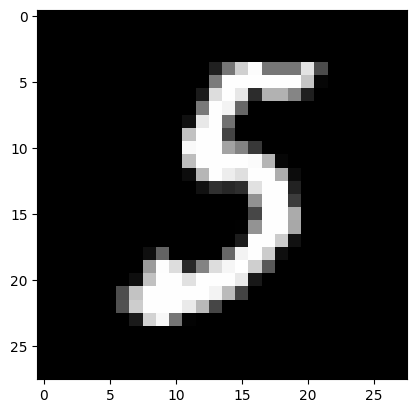

In [611]:
# work check

some_index = numpy.random.randint(60000)

predicted_number = classifier.classify_number_by_image(number_image=features_train[some_index])
print(f'prediction is {predicted_number}')

show_number_by_index(index=some_index, 
                    features= features_train, 
                    targets= target_train)